In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [7]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [8]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,...,Very High,80,1,10,3,Better,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,...,Medium,80,0,7,3,Better,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,...,High,80,0,8,3,Better,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,...,Very High,80,1,6,3,Better,2,2,2,2


In [2]:
def stacked_bar(df, cat1, cat2, condition, width = .35, rotation = 45, label1 = '', label2 = ''):
    df1 = df[df[cat2] == condition]
    df2 = df[df[cat2] != condition]
    
    dict1 = df1[cat1].value_counts().to_dict()
    dict2 = df2[cat1].value_counts().to_dict()
    
    key1 = dict1.keys()
    key2 = dict2.keys()
    
    value1 = list(dict1.values())
    value2 = list(dict2.values())
    
        
    plt.bar(key1, value1, width = width, color = 'blue', label = 'Non Attrition')
    plt.bar(key2, value2, width = width, bottom = value1, color = 'red', label = 'Attrition')
    plt.xlabel = 'Department'
    plt.ylabel = 'Respondents'
    plt.xticks(rotation = rotation)
    plt.legend()
    plt.show()

In [3]:
def stacked_bar_modified(df, cat1, cat2, condition, width = .35, rotation = 45, label1 = '', label2 = ''):
    df1 = df[df[cat2] == condition]
    df2 = df[df[cat2] != condition]
    
    dict1 = df1[cat1].value_counts().to_dict()
    dict2 = df2[cat1].value_counts().to_dict()
    
    key1 = sorted(dict1)
    key2 = sorted(dict2)
    
    value1 = []
    value2 = []
    
    for value in key1:
        value1.append(dict1[value])
    for value in key2:
        value2.append(dict2[value])
    
        
    plt.bar(key1, value1, width = width, color = 'blue', label = 'Non Attrition')
    plt.bar(key2, value2, width = width, bottom = value1, color = 'red', label = 'Attrition')
    plt.xlabel = 'Department'
    plt.ylabel = 'Respondents'
    plt.xticks(rotation = rotation)
    plt.legend()
    plt.show()

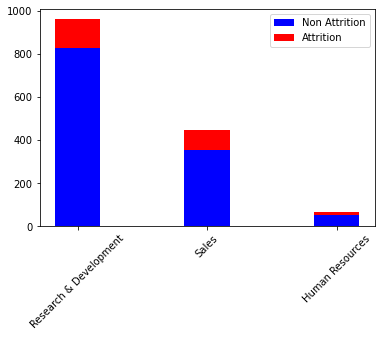

In [82]:
stacked_bar(df, 'Department', 'Attrition', 'No')

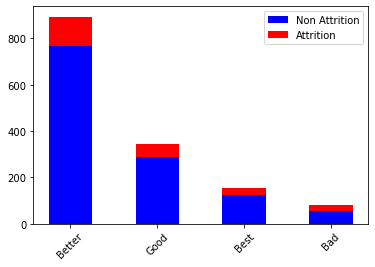

In [86]:
stacked_bar(df, 'WorkLifeBalance', 'Attrition', 'No', width = .5)

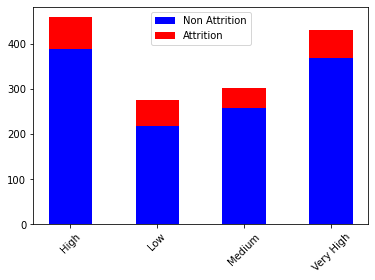

High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64
['High', 'Low', 'Medium', 'Very High']
[388, 219, 258, 368]
['High', 'Low', 'Medium', 'Very High']
[71, 57, 45, 64]


In [126]:
stacked_bar_modified(df, 'RelationshipSatisfaction', 'Attrition', 'No', width = .5)

# Chi Squared Tests

(5.241067859713708,
 0.1549724437105263,
 3,
 array([[384.99795918,  74.00204082],
        [231.50204082,  44.49795918],
        [254.14897959,  48.85102041],
        [362.35102041,  69.64897959]]))

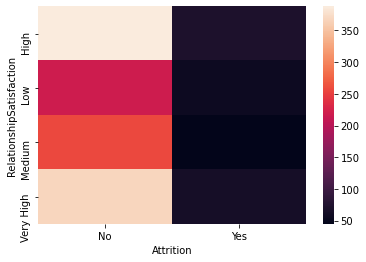

In [19]:
relationship_cross = pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
sns.heatmap(relationship_cross)
chi2_contingency(relationship_cross)

In [ ]:
p value of .154

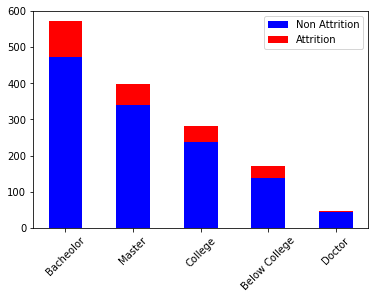

In [10]:
stacked_bar(df, 'Education', 'Attrition', 'No', width = .5)

(3.0739613982367193,
 0.5455253376565949,
 4,
 array([[479.77959184,  92.22040816],
        [142.59183673,  27.40816327],
        [236.53469388,  45.46530612],
        [ 40.26122449,   7.73877551],
        [333.83265306,  64.16734694]]))

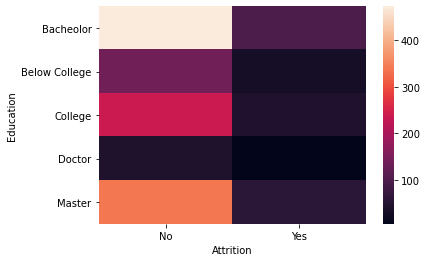

In [20]:
education_cross = pd.crosstab(df['Education'], df['Attrition'])
sns.heatmap(education_cross)
chi2_contingency(education_cross)

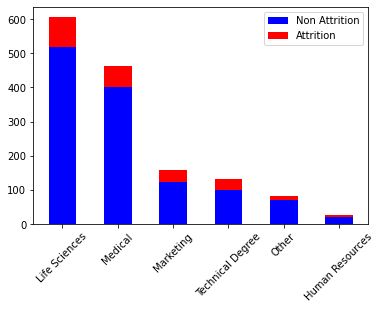

In [83]:
stacked_bar(df, 'EducationField', 'Attrition', 'No', width = .5)

(16.024674119585427,
 0.006773980139025212,
 5,
 array([[ 22.64693878,   4.35306122],
        [508.29795918,  97.70204082],
        [133.36530612,  25.63469388],
        [389.19183673,  74.80816327],
        [ 68.77959184,  13.22040816],
        [110.71836735,  21.28163265]]))

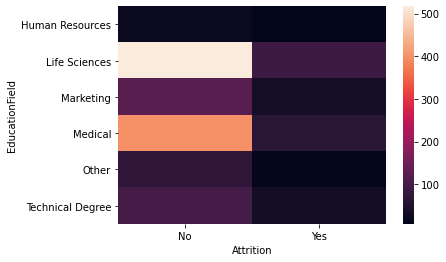

In [21]:
field_cross = pd.crosstab(df['EducationField'], df['Attrition'])
sns.heatmap(field_cross)
chi2_contingency(field_cross)